In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import datetime, timedelta
import yfinance as yf

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import yfinance as yf
end_date = datetime.now() - timedelta(days=30)
end_date_str = end_date.strftime('%Y-%m-%d')
df = yf.download('AAPL',start='2010-01-01',end=end_date_str)
dftest=yf.download('AAPL',start=end_date_str)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.479000,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800
...,...,...,...,...,...,...
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.545319,44846000
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.741104,56934900


In [4]:
df = df.reset_index()
dftest = dftest.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.479000,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [5]:
df.drop(['Date','Adj Close'],axis=1,inplace=True)
dftest.drop(['Date','Adj Close'],axis=1,inplace=True)

In [6]:
dftest.shape

(19, 5)

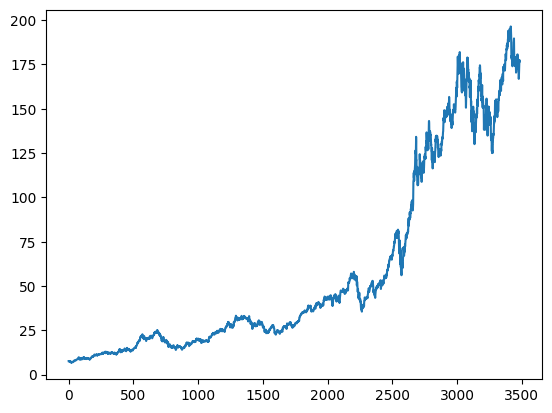

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


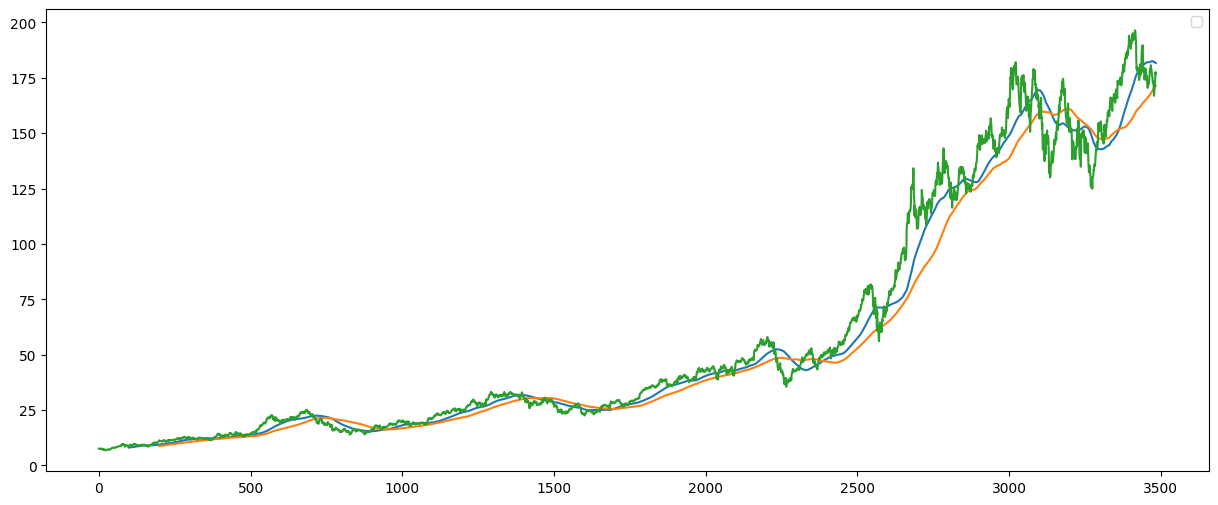

In [9]:
plt.figure(figsize=(15,6))
plt.plot(ma100)
plt.plot(ma200)
plt.plot(df.Close)
plt.legend()

In [10]:
df.shape

(3484, 5)

In [11]:
df1=pd.DataFrame(df['Close'])
df1

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
3479,170.289993
3480,170.770004
3481,173.970001
3482,177.570007


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(df1)
df1.shape

(3484, 1)

In [14]:
len(df1)-120-1
aa=df1[1:(1+120),0]
aa

array([4.20641999e-03, 3.56406040e-03, 3.49058981e-03, 3.75431632e-03,
       3.40205891e-03, 2.95183652e-03, 3.50377638e-03, 3.27396073e-03,
       2.61464697e-03, 4.33074554e-03, 3.70722643e-03, 3.01776689e-03,
       1.07373646e-03, 2.07589368e-03, 2.61653077e-03, 2.98197978e-03,
       1.36383361e-03, 1.88128164e-06, 5.04842430e-04, 7.17706429e-04,
       1.35253083e-03, 0.00000000e+00, 6.42354561e-04, 3.89933345e-04,
       7.79871721e-04, 5.78307987e-04, 1.24704073e-03, 1.56916494e-03,
       2.13805897e-03, 1.97794128e-03, 2.04952053e-03, 1.81216717e-03,
       1.57669761e-03, 9.43757005e-04, 1.62191125e-03, 1.87433246e-03,
       2.36787463e-03, 3.19107870e-03, 3.16470555e-03, 3.25512025e-03,
       3.51507917e-03, 5.06729497e-03, 5.09178432e-03, 5.83398262e-03,
       6.17682357e-03, 6.30114912e-03, 6.50836676e-03, 5.98845144e-03,
       6.10335801e-03, 6.04119523e-03, 6.14103394e-03, 5.68893279e-03,
       6.15987191e-03, 6.83990492e-03, 7.03016588e-03, 6.51778323e-03,
      

In [15]:
def split(dataset):
	time_step=120
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [16]:
X_train,y_train=split(df1)

In [17]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_train.shape

(3363, 120)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-12-04 10:18:50.273958: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 10:18:52.570756: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 10:18:52.570860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 10:18:52.915597: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 10:18:53.643892: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 10:18:53.645011: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(120,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.fit(X_train,y_train,epochs=50,batch_size=14,verbose=2)

Epoch 1/50
241/241 - 20s - loss: 0.0023 - 20s/epoch - 84ms/step
Epoch 2/50
241/241 - 17s - loss: 5.8535e-04 - 17s/epoch - 69ms/step
Epoch 3/50
241/241 - 17s - loss: 5.0070e-04 - 17s/epoch - 69ms/step
Epoch 4/50
241/241 - 16s - loss: 3.6133e-04 - 16s/epoch - 68ms/step
Epoch 5/50
241/241 - 17s - loss: 3.4101e-04 - 17s/epoch - 70ms/step
Epoch 6/50
241/241 - 16s - loss: 2.7502e-04 - 16s/epoch - 67ms/step
Epoch 7/50
241/241 - 17s - loss: 2.6652e-04 - 17s/epoch - 70ms/step
Epoch 8/50
241/241 - 18s - loss: 2.0055e-04 - 18s/epoch - 74ms/step
Epoch 9/50
241/241 - 17s - loss: 2.1938e-04 - 17s/epoch - 69ms/step
Epoch 10/50
241/241 - 17s - loss: 2.8049e-04 - 17s/epoch - 71ms/step
Epoch 11/50
241/241 - 23s - loss: 1.9546e-04 - 23s/epoch - 97ms/step
Epoch 12/50
241/241 - 21s - loss: 2.0986e-04 - 21s/epoch - 88ms/step
Epoch 13/50
241/241 - 19s - loss: 2.3906e-04 - 19s/epoch - 79ms/step
Epoch 14/50
241/241 - 18s - loss: 1.7088e-04 - 18s/epoch - 75ms/step
Epoch 15/50
241/241 - 17s - loss: 1.5532e-04 - 

In [22]:
model.save('lmodel.h5')

In [23]:
train_predict=model.predict(X_train)

106/106 [==============================] - 3s 24ms/step


In [24]:
train_predict=scaler.inverse_transform(train_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

80.81094069776931

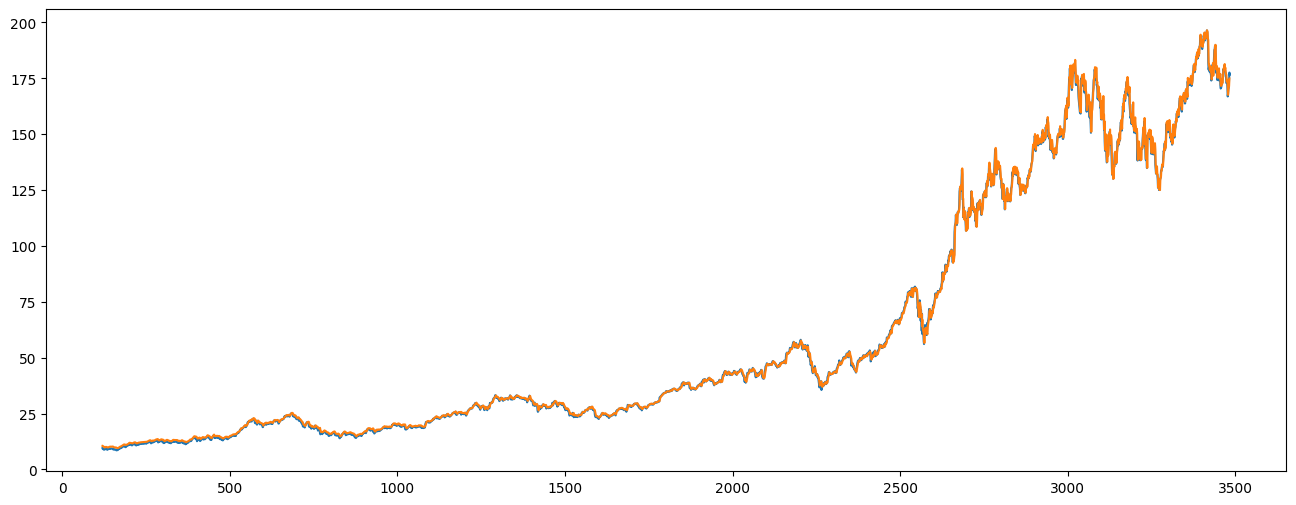

In [32]:
look_back=120
trainPredictPlot = np.empty_like(df[['Close']])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
plt.figure(figsize=(16,6))
plt.plot(df[['Close']][120:])
plt.plot(trainPredictPlot)
plt.show()

In [59]:
x_input=np.array(df1[-120:]).reshape(1,-1)

In [60]:
x_input.shape

(1, 120)

In [61]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
lst_output=[]
n_steps=120
i=0
while(i<60):
    x_input = x_input.reshape((1,120,1))
    yhat = model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

[[0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579750061], [0.896863579

In [68]:
new_pred= np.array(lst_output)
new_pred= new_pred.reshape(-1,1)
new_pred.shape

(60, 1)

In [69]:
unscaled_pred=pd.DataFrame(scaler.inverse_transform(new_pred))
real_values= pd.DataFrame(scaler.inverse_transform(df1))

In [72]:
plus60days_pred = pd.concat([real_values,unscaled_pred])
plus60days_pred.reset_index(drop=True,inplace=True)

In [73]:
plus30days_real = pd.concat([real_values,dftest[['Close']]])
plus30days_real.reset_index(drop=True,inplace=True)

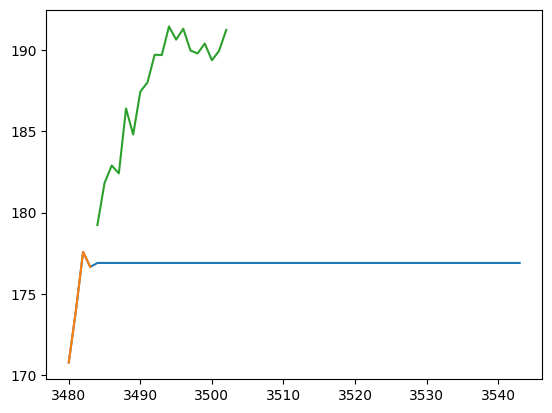

In [82]:
plt.plot(plus60days_pred[3480:])
plt.plot(plus30days_real[3480:])